In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [159]:
df = pd.read_csv("/content/sample_data/dados.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.3.17,35.215.230.89,UDP,345,51074 > 50007 Len=303
1,2,0.003836,192.168.3.17,35.215.230.89,UDP,1099,51074 > 50007 Len=1057
2,3,0.003872,192.168.3.17,35.215.230.89,UDP,345,51074 > 50007 Len=303
3,4,0.004701,192.168.3.17,35.215.196.48,UDP,144,55247 > 50005 Len=102
4,5,0.014513,192.168.3.17,35.215.230.89,UDP,201,51074 > 50007 Len=159


In [160]:
df = df.drop(columns=["No.", "Info"])
df.head()

,Time,Source,Destination,Protocol,Length
0,0.000000,192.168.3.17,35.215.230.89,UDP,345
1,0.003836,192.168.3.17,35.215.230.89,UDP,1099
2,0.003872,192.168.3.17,35.215.230.89,UDP,345
3,0.004701,192.168.3.17,35.215.196.48,UDP,144
4,0.014513,192.168.3.17,35.215.230.89,UDP,201


In [161]:
df.rename(columns={
    "Source": "Origem",
    "Destination": "Destino",
    "Protocol": "Protocolo",
    "Length": "Tamanho"
}, inplace=True)

df.head()

,Time,Origem,Destino,Protocolo,Tamanho
0,0.000000,192.168.3.17,35.215.230.89,UDP,345
1,0.003836,192.168.3.17,35.215.230.89,UDP,1099
2,0.003872,192.168.3.17,35.215.230.89,UDP,345
3,0.004701,192.168.3.17,35.215.196.48,UDP,144
4,0.014513,192.168.3.17,35.215.230.89,UDP,201


In [162]:
dfICMP = df[df["Protocolo"] == "ICMP"].sort_values(by = ["Origem", "Destino", "Tamanho", "Time"])
dfTCP = df[df["Protocolo"] == "TCP"].sort_values(by = ["Origem", "Destino", "Time"])

In [163]:
print(f"Shape ICMP: {dfICMP.shape}")
dfICMP.head(25)

Shape ICMP: (24, 5)


,Time,Origem,Destino,Protocolo,Tamanho
4360,23.287729,172.217.29.110,192.168.3.17,ICMP,134
4481,24.289807,172.217.29.110,192.168.3.17,ICMP,134
4645,25.292600,172.217.29.110,192.168.3.17,ICMP,134
4728,26.297278,172.217.29.110,192.168.3.17,ICMP,134
5542,32.609995,172.217.29.78,192.168.3.17,ICMP,170
6009,33.612363,172.217.29.78,192.168.3.17,ICMP,170
6463,34.615844,172.217.29.78,192.168.3.17,ICMP,170
6765,35.620096,172.217.29.78,192.168.3.17,ICMP,170
4358,23.280248,192.168.3.17,172.217.29.110,ICMP,134
4479,24.282326,192.168.3.17,172.217.29.110,ICMP,134


In [164]:
print(f"Shape TCP: {dfTCP.shape}")
dfTCP.head(25)

Shape TCP: (9418, 5)


,Time,Origem,Destino,Protocolo,Tamanho
17199,58.637242,13.107.42.14,192.168.3.17,TCP,66
17202,58.645317,13.107.42.14,192.168.3.17,TCP,60
17204,58.646453,13.107.42.14,192.168.3.17,TCP,1466
17205,58.646496,13.107.42.14,192.168.3.17,TCP,1466
17207,58.646552,13.107.42.14,192.168.3.17,TCP,1466
17215,58.657101,13.107.42.14,192.168.3.17,TCP,60
17216,58.657387,13.107.42.14,192.168.3.17,TCP,60
17217,58.657406,13.107.42.14,192.168.3.17,TCP,60
17237,58.666736,13.107.42.14,192.168.3.17,TCP,60
32310,67.450350,13.107.42.14,192.168.3.17,TCP,60


In [165]:
dfICMP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 4360 to 2945
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       24 non-null     float64
 1   Origem     24 non-null     object 
 2   Destino    24 non-null     object 
 3   Protocolo  24 non-null     object 
 4   Tamanho    24 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ KB


In [166]:
dfTCP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9418 entries, 17199 to 35036
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       9418 non-null   float64
 1   Origem     9418 non-null   object 
 2   Destino    9418 non-null   object 
 3   Protocolo  9418 non-null   object 
 4   Tamanho    9418 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 441.5+ KB


In [167]:
dfICMP["Tempo"] = dfICMP.groupby(["Origem", "Destino", "Tamanho"])["Time"].diff()
dfTCP["Tempo"] = dfTCP.groupby(["Origem", "Destino"])["Time"].diff()

dfICMP["Tempo"] = dfICMP.groupby(["Origem", "Destino", "Tamanho"])["Tempo"].transform(lambda x: x.fillna(x.mean()))
dfTCP["Tempo"] = dfTCP.groupby(["Origem", "Destino"])["Tempo"].transform(lambda x: x.fillna(x.mean()))

In [168]:
dfTCP[dfTCP.isnull().any(axis=1)]

,Time,Origem,Destino,Protocolo,Tamanho,Tempo
1541,6.079012,2607:f8b0:4002:c0c::5e,2804:7acc:a98:4700:2099:230f:289b:c684,TCP,74,NaN
7863,39.732311,3.168.122.90,192.168.3.17,TCP,60,NaN


In [169]:
def calculateStatistics(group):
    flowDuration = group["Time"].max() - group["Time"].min()
    maxTime = group["Tempo"].max()
    minTime = group["Tempo"].min()
    avgTime = group["Tempo"].mean()
    totalSize = group["Tamanho"].sum()
    maxSize = group["Tamanho"].max()
    minSize = group["Tamanho"].min()
    avgSize = group["Tamanho"].mean()
    bitRate = totalSize / flowDuration if flowDuration > 0 else 0

    return pd.Series({
        "DuracaoFluxo": flowDuration,
        "TempoMax": maxTime,
        "TempoMin": minTime,
        "TempoMed": avgTime,
        "TamSoma": totalSize,
        "TamMax": maxSize,
        "TamMin": minSize,
        "TamMed": avgSize,
        "BitRate": bitRate
    })

dfICMPFlows = dfICMP.groupby(["Origem", "Destino", "Tamanho"]).apply(calculateStatistics).reset_index()
dfTCPFlows = dfTCP.groupby(["Origem", "Destino"]).apply(calculateStatistics).reset_index()

<ipython-input-169-1ad6d005c166>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfICMPFlows = dfICMP.groupby(["Origem", "Destino", "Tamanho"]).apply(calculateStatistics).reset_index()
<ipython-input-169-1ad6d005c166>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfTCPFlows = dfTCP.groupby(["Origem", "Destino"]).apply(calculateStatistics).reset_index()


In [170]:
print(f"Shape dfICMPFlows: {dfICMPFlows.shape}")
print(f"Shape dfTCPFlows: {dfTCPFlows.shape}")

Shape dfICMPFlows: (6, 12)
Shape dfTCPFlows: (137, 11)


In [171]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [149]:
dfICMPFlows

,Origem,Destino,Tamanho,DuracaoFluxo,TempoMax,TempoMin,TempoMed,TamSoma,TamMax,TamMin,TamMed,BitRate
0,172.217.29.110,192.168.3.17,134,3.009549,1.004678,1.002078,1.003183,536.0,134.0,134.0,134.0,178.099775
1,172.217.29.78,192.168.3.17,170,3.010101,1.004252,1.002368,1.003367,680.0,170.0,170.0,170.0,225.906041
2,192.168.3.17,172.217.29.110,134,3.007385,1.002798,1.002078,1.002462,536.0,134.0,134.0,134.0,178.227929
3,192.168.3.17,172.217.29.78,170,3.010165,1.004065,1.002586,1.003388,680.0,170.0,170.0,170.0,225.901238
4,192.168.3.17,66.254.114.41,106,3.007579,1.003068,1.002218,1.002526,424.0,106.0,106.0,106.0,140.977178
5,66.254.114.41,192.168.3.17,106,3.007684,1.002959,1.002173,1.002561,424.0,106.0,106.0,106.0,140.972256


In [172]:
dfTCPFlows

,Origem,Destino,DuracaoFluxo,TempoMax,TempoMin,TempoMed,TamSoma,TamMax,TamMin,TamMed,BitRate
0,13.107.42.14,192.168.3.17,8.956728,8.783614,0.000019,0.895673,4884.0,1466.0,60.0,444.000000,5.452884e+02
1,13.107.9.158,192.168.3.17,45.010226,45.010226,45.010226,45.010226,132.0,66.0,66.0,66.000000,2.932667e+00
2,138.197.240.19,192.168.3.17,0.241675,0.124674,0.000054,0.080558,246.0,66.0,60.0,61.500000,1.017896e+03
3,142.251.40.130,192.168.3.17,0.408933,0.260181,0.000056,0.068155,3244.0,1466.0,60.0,463.428571,7.932840e+03
4,151.101.0.134,192.168.3.17,4.658816,3.015312,0.000000,0.232941,20660.0,1466.0,60.0,983.809524,4.434603e+03
5,151.101.64.134,192.168.3.17,0.019833,0.012191,0.007642,0.009916,186.0,66.0,60.0,62.000000,9.378309e+03
6,157.240.12.53,192.168.3.17,18.086823,18.086823,18.086823,18.086823,120.0,60.0,60.0,60.000000,6.634664e+00
7,157.240.222.60,192.168.3.17,18.101514,18.101514,18.101514,18.101514,120.0,60.0,60.0,60.000000,6.629280e+00
8,157.240.226.60,192.168.3.17,18.080738,18.080738,18.080738,18.080738,120.0,60.0,60.0,60.000000,6.636897e+00
9,162.159.128.233,192.168.3.17,7.570471,1.222635,0.057007,0.140194,3318.0,66.0,60.0,60.327273,4.382818e+02


In [173]:
dfICMPFlows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Origem        6 non-null      object 
 1   Destino       6 non-null      object 
 2   Tamanho       6 non-null      int64  
 3   DuracaoFluxo  6 non-null      float64
 4   TempoMax      6 non-null      float64
 5   TempoMin      6 non-null      float64
 6   TempoMed      6 non-null      float64
 7   TamSoma       6 non-null      float64
 8   TamMax        6 non-null      float64
 9   TamMin        6 non-null      float64
 10  TamMed        6 non-null      float64
 11  BitRate       6 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 708.0+ bytes


In [174]:
dfTCPFlows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Origem        137 non-null    object 
 1   Destino       137 non-null    object 
 2   DuracaoFluxo  137 non-null    float64
 3   TempoMax      135 non-null    float64
 4   TempoMin      135 non-null    float64
 5   TempoMed      135 non-null    float64
 6   TamSoma       137 non-null    float64
 7   TamMax        137 non-null    float64
 8   TamMin        137 non-null    float64
 9   TamMed        137 non-null    float64
 10  BitRate       137 non-null    float64
dtypes: float64(9), object(2)
memory usage: 11.9+ KB


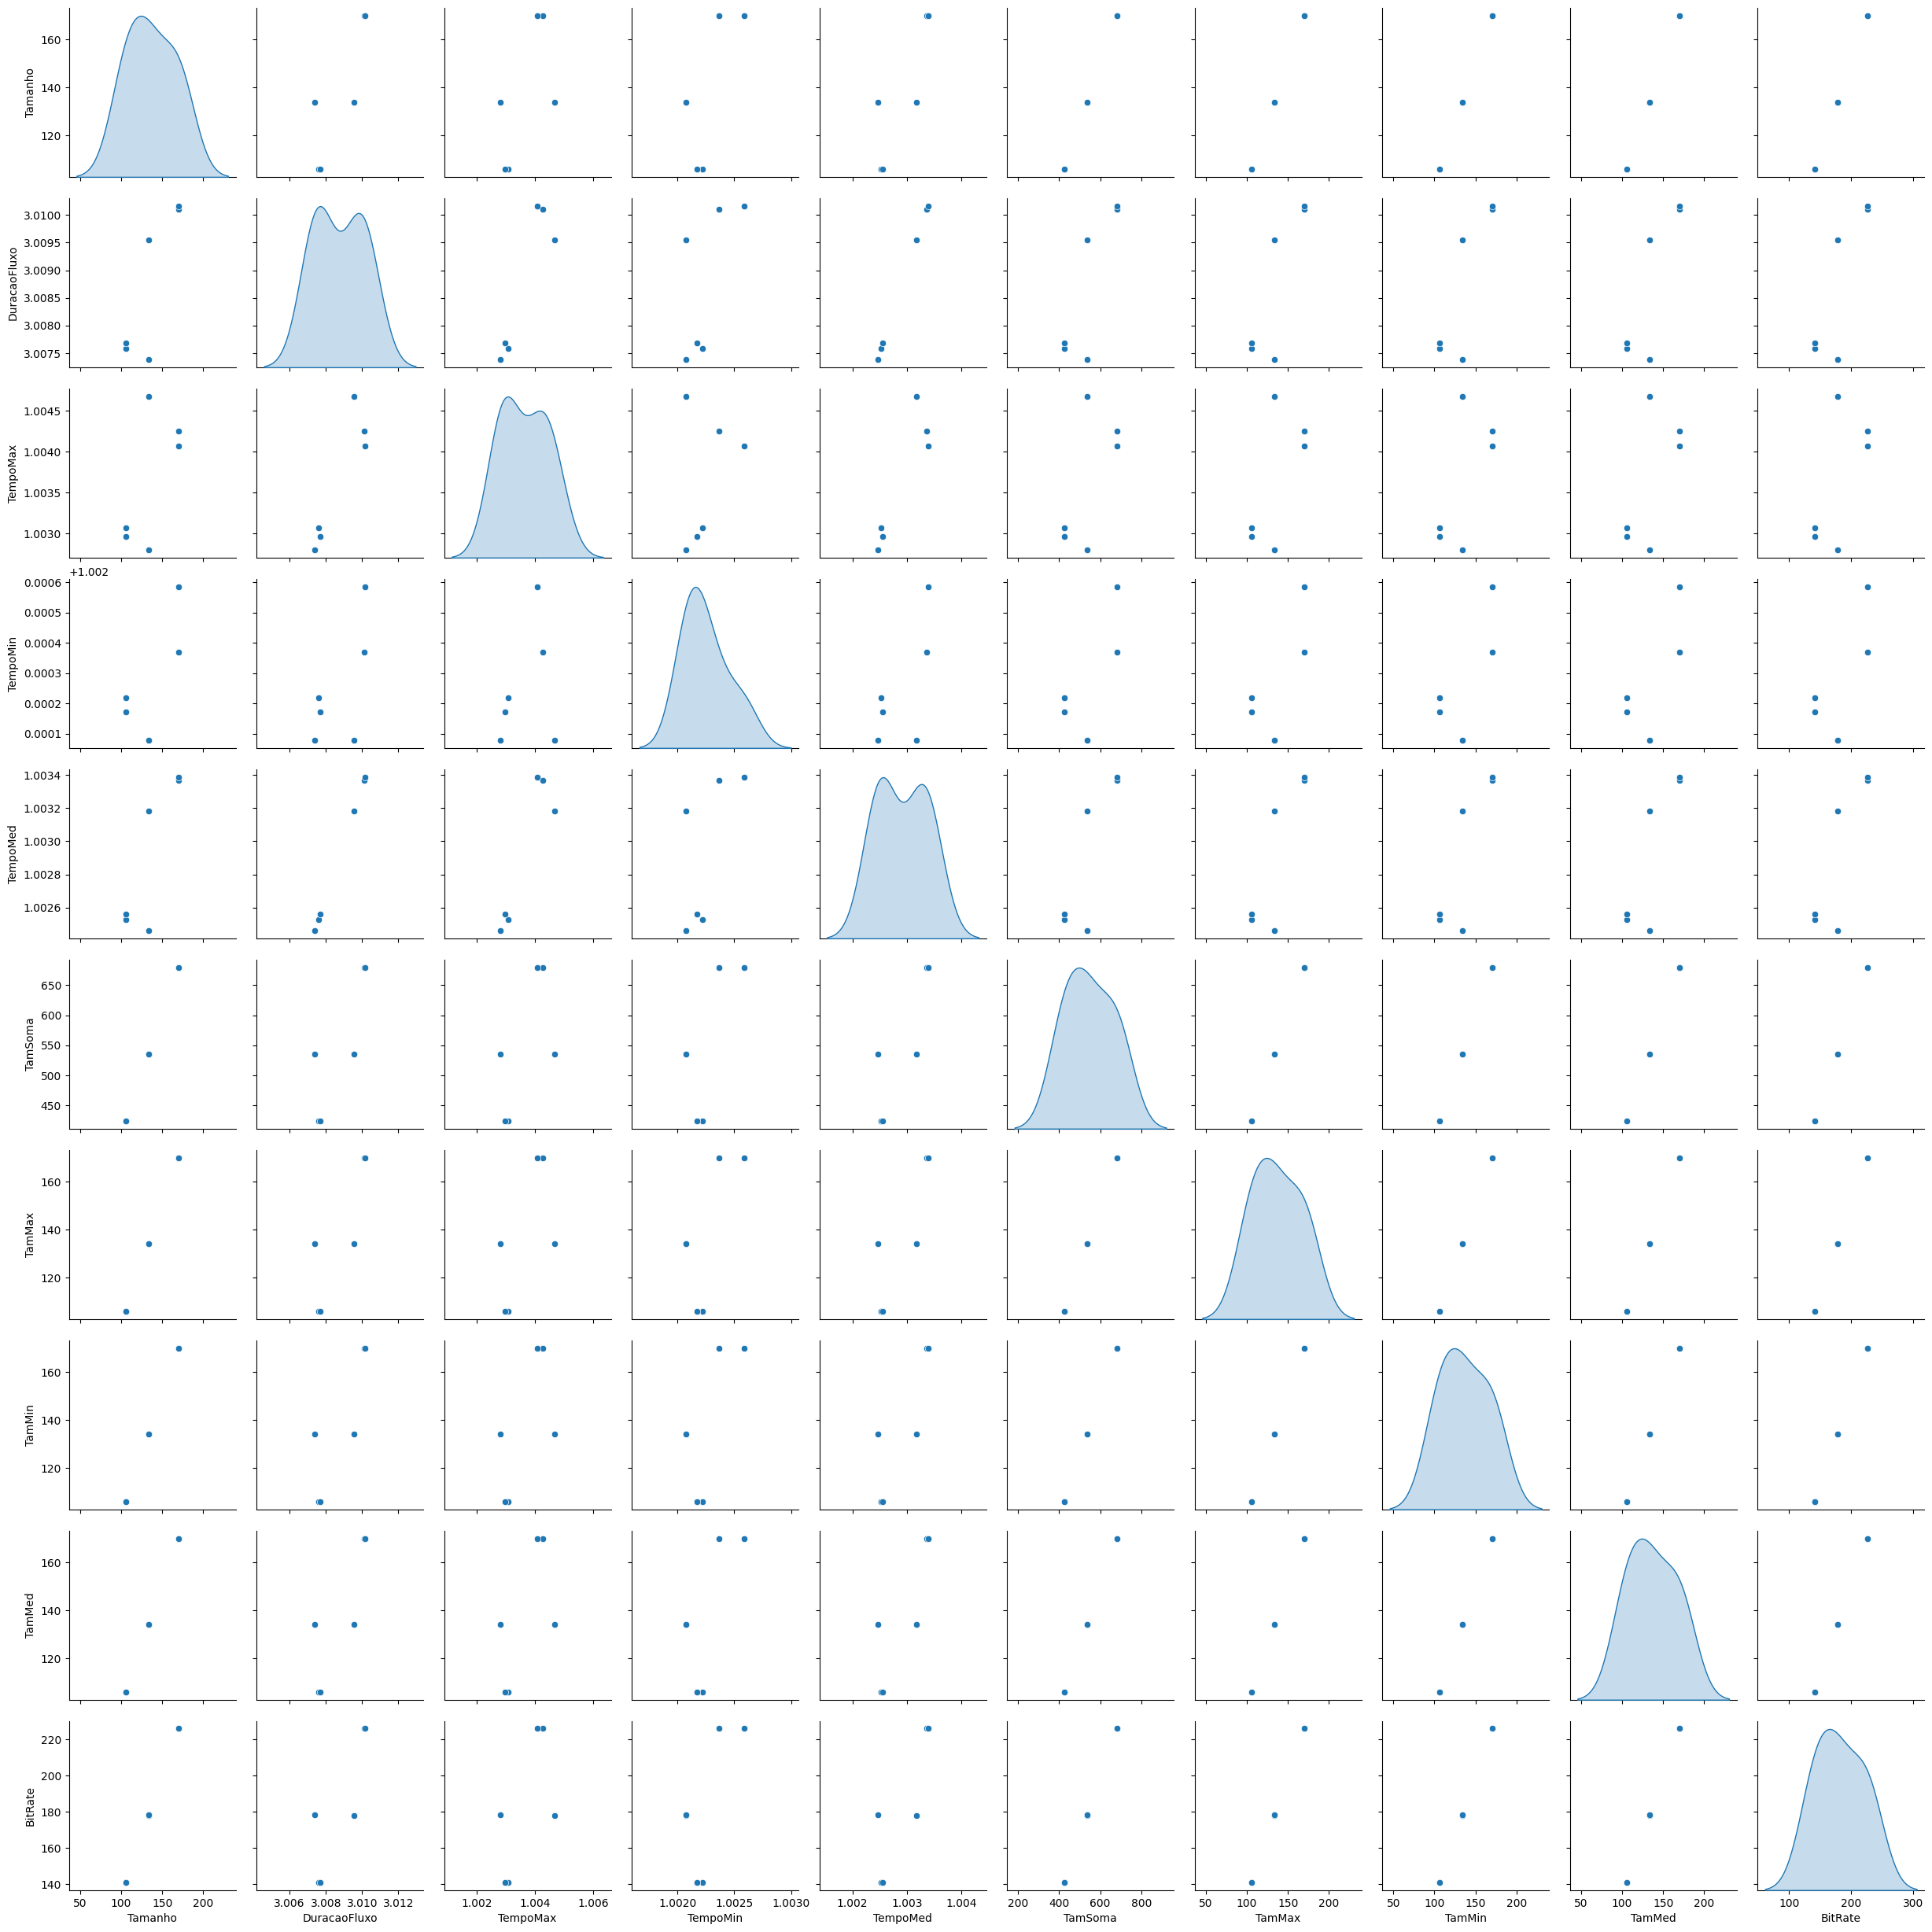

In [175]:
sns.pairplot(dfICMPFlows.select_dtypes(include=["number"]), diag_kind="kde")
plt.show()

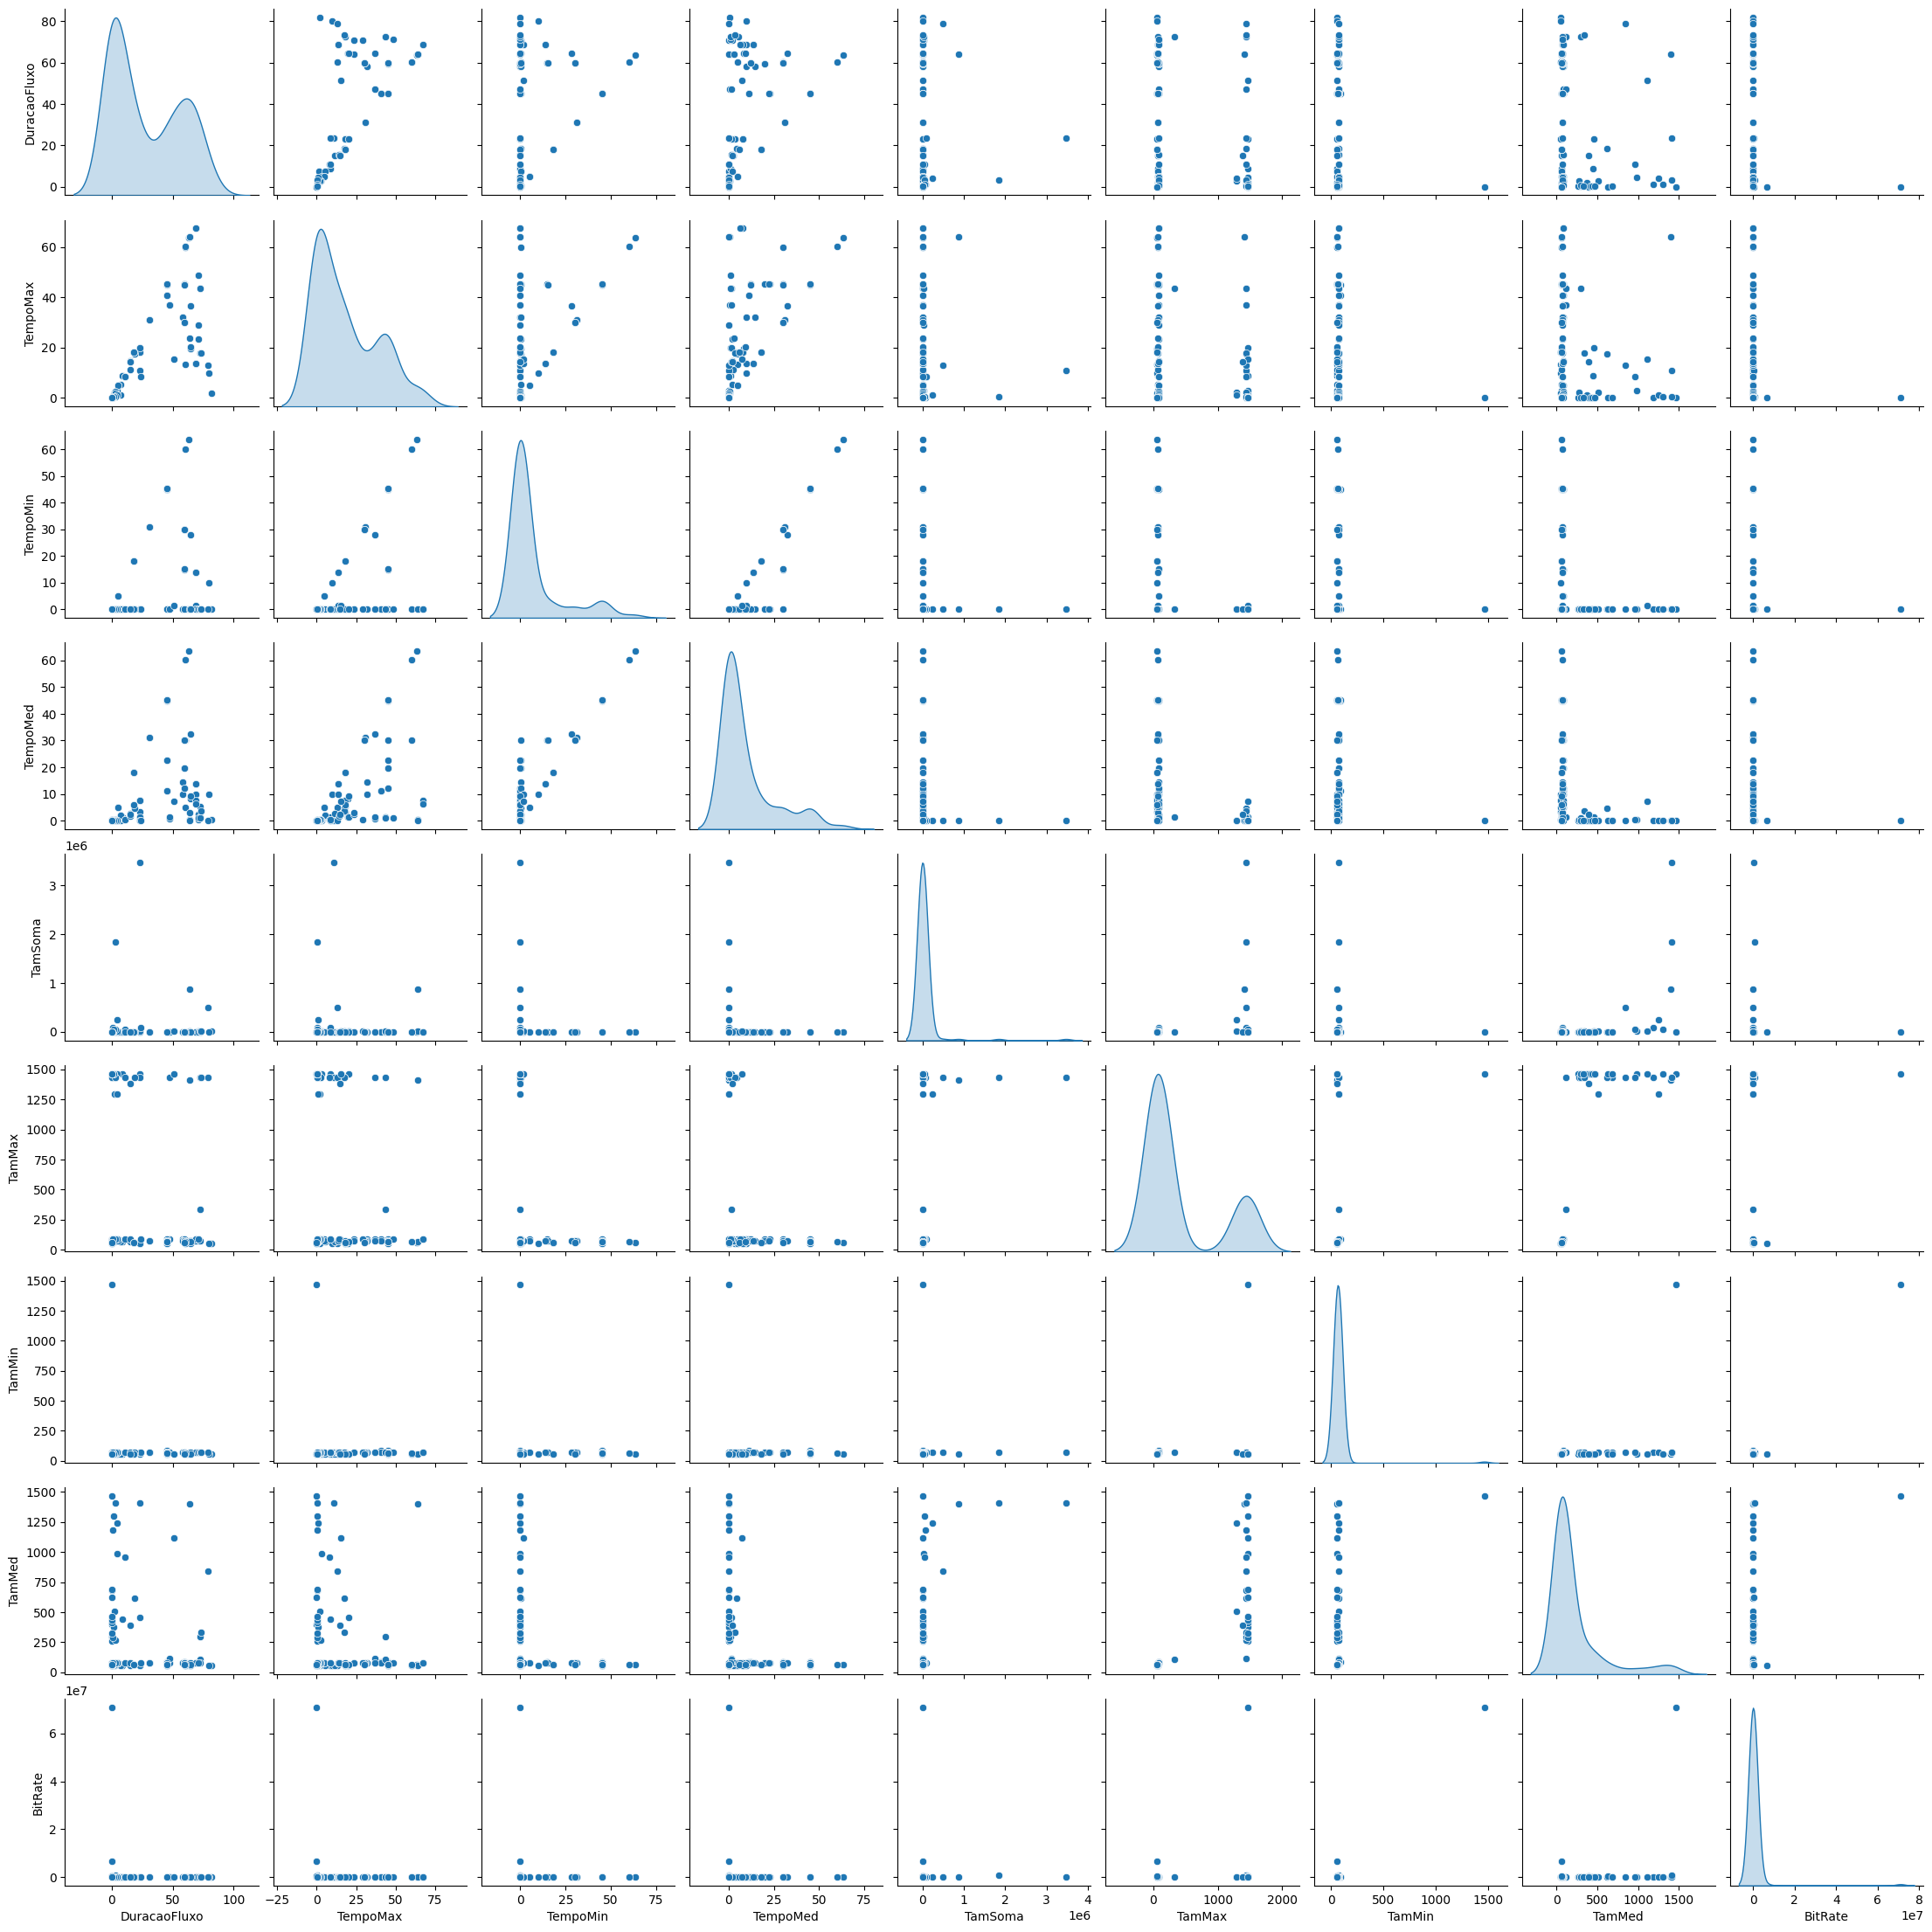

In [176]:
sns.pairplot(dfTCPFlows.select_dtypes(include=["number"]), diag_kind = 'kde')
plt.show()